In [3]:
import sys
sys.path.append("../notebooks/scripts/")

# Imports Section 

In [4]:
import altair as alt
from altair_saver import save
from augur.utils import json_to_tree
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
import seaborn as sns

from Helpers import linking_tree_with_plots_clickable, linking_tree_with_plots_brush, scatterplot_with_tooltip_interactive
from Helpers import get_y_positions

%matplotlib inline

In [ ]:
alt.renderers.set_embed_options(
    padding={"left": 0, "right": 0, "bottom": 1, "top": 1}
)

In [12]:
sns.set_style("ticks")
# Disable top and right spines.
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
# Display and save figures at higher resolution for presentations and manuscripts.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 100
# Display text at sizes large enough for presentations and manuscripts.
mpl.rcParams['font.weight'] = "normal"
mpl.rcParams['axes.labelweight'] = "normal"
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 8
mpl.rc('text', usetex=False)

In [28]:
try: 
    snakemake.input.node_df
    import selenium
    from selenium.webdriver import Chrome 
    from selenium import webdriver
    import selenium.webdriver
    
    driver = selenium.webdriver.Chrome()
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument("--remote-debugging-port=9222")

    browser = webdriver.Chrome(options=chrome_options)
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


In [7]:
try:
    cross_v_thresholds = snakemake.input.cross_v_thresholds
    #KDE Density:
    KDE_pca = snakemake.input.KDE_pca
    KDE_pca_metadata_SVM = snakemake.input.KDE_pca_metadata_SVM
    KDE_pca_metadata_cross_v = snakemake.input.KDE_pca_metadata_cross_v

    KDE_mds = snakemake.input.KDE_mds
    KDE_mds_metadata_SVM = snakemake.input.KDE_mds_metadata_SVM
    KDE_mds_metadata_cross_v = snakemake.input.KDE_mds_metadata_cross_v

    KDE_tsne = snakemake.input.KDE_tsne
    KDE_tsne_metadata_SVM = snakemake.input.KDE_tsne_metadata_SVM
    KDE_tsne_metadata_cross_v = snakemake.input.KDE_tsne_metadata_cross_v

    KDE_umap = snakemake.input.KDE_umap
    KDE_umap_metadata_SVM = snakemake.input.KDE_umap_metadata_SVM
    KDE_umap_metadata_cross_v = snakemake.input.KDE_umap_metadata_cross_v
    
    KDE_genetic = snakemake.input.KDE_genetic
    KDE_genetic_metadata_SVM = snakemake.input.KDE_genetic_metadata_SVM
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


# KDE Density Plots

In [7]:
#KDE_pca = "results/KDEDensity_pca.csv"
#KDE_pca_metadata = "results/KDEDensity_pca_metadata.csv"

#KDE_mds = "results/KDEDensity_mds.csv"
#KDE_mds_metadata = "results/KDEDensity_mds_metadata.csv"

#KDE_tsne = "results/KDEDensity_t-sne.csv"
#KDE_tsne_metadata = "results/KDEDensity_t-sne_metadata.csv"

#KDE_umap = "results/KDEDensity_umap.csv"
#KDE_umap_metadata = "results/KDEDensity_umap_metadata.csv"

#KDE_genetic = "results/KDEDensity_genetic.csv"
#KDE_genetic_metadata = "results/KDEDensity_genetic_metadata.csv"


Genetic_KDE_df = pd.read_csv(KDE_genetic)
Genetic_KDE_metadata_SVM_df = pd.read_csv(KDE_genetic_metadata_SVM)
PCA_KDE_df = pd.read_csv(KDE_pca)
PCA_KDE_metadata_SVM_df = pd.read_csv(KDE_pca_metadata_SVM)
PCA_KDE_metadata_cross_v_df = pd.read_csv(KDE_pca_metadata_cross_v)
MDS_KDE_df = pd.read_csv(KDE_mds)
MDS_KDE_metadata_SVM_df = pd.read_csv(KDE_mds_metadata_SVM)
MDS_KDE_metadata_cross_v_df = pd.read_csv(KDE_mds_metadata_cross_v)
TSNE_KDE_df = pd.read_csv(KDE_tsne)
TSNE_KDE_metadata_SVM_df = pd.read_csv(KDE_tsne_metadata_SVM)
TSNE_KDE_metadata_cross_v_df = pd.read_csv(KDE_tsne_metadata_cross_v)
UMAP_KDE_df = pd.read_csv(KDE_umap)
UMAP_KDE_metadata_SVM_df = pd.read_csv(KDE_umap_metadata_SVM)
UMAP_KDE_metadata_cross_v_df = pd.read_csv(KDE_umap_metadata_cross_v)

cross_v_values = pd.read_csv(cross_v_thresholds)

In [68]:
import matplotlib.gridspec as gridspec

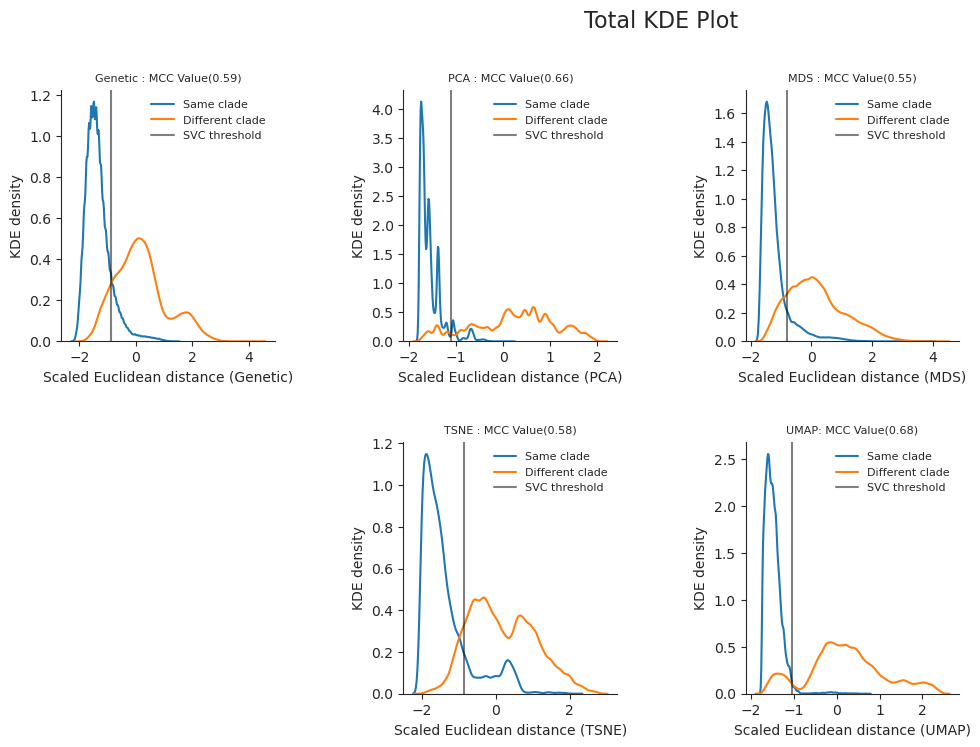

In [70]:
#fig, axes = plt.subplots(1, 5, figsize=(40, 8))
fig = plt.figure(figsize=(16, 8), constrained_layout=False)
gs = gridspec.GridSpec(2, 4, figure=fig, hspace=0.4, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])



#GENETIC 
ax1 = sns.kdeplot(Genetic_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax1)
ax1 = sns.kdeplot(Genetic_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax1)
ax1.axvline(x=Genetic_KDE_metadata_SVM_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax1.legend(frameon=False)
ax1.set_title('Genetic : MCC Value(' + str(round(Genetic_KDE_metadata_SVM_df["MCC"].values.tolist()[0],2))+ ')')
ax1.set_xlabel("Scaled Euclidean distance (Genetic)")
ax1.set_ylabel("KDE density")

#PCA
ax2 = sns.kdeplot(PCA_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax2)
ax2 = sns.kdeplot(PCA_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax2)
ax2.axvline(x=PCA_KDE_metadata_SVM_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax2.axvline(x=cross_v_values.loc[cross_v_values['method'] == "PCA"]["threshold"].values.tolist()[0], label="cross validation threshold", color="#800000", alpha=0.5)
ax2.legend(frameon=False, loc="upper right")
ax2.set_title('PCA : MCC Value(' + str(round(PCA_KDE_metadata_SVM_df["MCC"].values.tolist()[0],2))+ ')')
ax2.set_xlabel("Scaled Euclidean distance (PCA)")
ax2.set_ylabel("KDE density")

#MDS
ax3 = sns.kdeplot(MDS_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax3)
ax3 = sns.kdeplot(MDS_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax3)
ax3.axvline(x=MDS_KDE_metadata_SVM_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax3.axvline(x=cross_v_values.loc[cross_v_values['method'] == "MDS"]["threshold"].values.tolist()[0], label="cross validation threshold", color="#800000", alpha=0.5)
ax3.legend(frameon=False, loc="upper right")
ax3.set_title('MDS : MCC Value(' + str(round(MDS_KDE_metadata_SVM_df["MCC"].values.tolist()[0],2))+ ')')
ax3.set_xlabel("Scaled Euclidean distance (MDS)")
ax3.set_ylabel("KDE density")

#TSNE
ax4 = sns.kdeplot(TSNE_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax4)
ax4 = sns.kdeplot(TSNE_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax4)
ax4.axvline(x=TSNE_KDE_metadata_SVM_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax4.axvline(x=cross_v_values.loc[cross_v_values['method'] == "t-SNE"]["threshold"].values.tolist()[0], label="cross validation threshold", color="#800000", alpha=0.5)
ax4.legend(frameon=False, loc="upper right")
ax4.set_title('TSNE : MCC Value(' + str(round(TSNE_KDE_metadata_SVM_df["MCC"].values.tolist()[0],2))+ ')')
ax4.set_xlabel("Scaled Euclidean distance (TSNE)")
ax4.set_ylabel("KDE density")

#UMAP
ax5 = sns.kdeplot(UMAP_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax5)
ax5 = sns.kdeplot(UMAP_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax5)
ax5.axvline(x=UMAP_KDE_metadata_SVM_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax5.axvline(x=cross_v_values.loc[cross_v_values['method'] == "UMAP"]["threshold"].values.tolist()[0], label="cross validation threshold", color="#800000", alpha=0.5)
ax5.legend(frameon=False, loc="upper right")
ax5.set_title('UMAP: MCC Value(' + str(round(UMAP_KDE_metadata_SVM_df["MCC"].values.tolist()[0],2))+ ')')
ax5.set_xlabel("Scaled Euclidean distance (UMAP)")
ax5.set_ylabel("KDE density")

sns.despine()
plt.savefig(snakemake.output.KDE_density, dpi=600, bbox_inches='tight')